## TASK 1

Prediction using Supervised ML

(Level - Beginner)

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?

## Regression

What Is Regression?

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

## Simple Linear Regression 

What is Simple Linear Regression?

            Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables
Simple linear regression uses two variables where one independent variable to explain or predict the outcome of the dependent variable Y, while multiple linear regression uses two or more independent variables to predict the outcome.

## Supervised learning

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

## Task

To Predict the percentage of an student based on the number of study hours using supervised and simple linear regression method.

### Importing the required libraries!

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [2]:
## to read the data from the link 

data = pd.read_csv(r"C:\Users\Swaroop\Downloads\student_scores - student_scores.csv")
print("The data has been loaded")

data.head()

The data has been loaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### From the above output we  see that the data shape is of  25 rows and 2 colomns. 

In [3]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

### Displaying the columns and the very basic info using data.info()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The method.info() shows the information about the given Dataset including the index dtype and column dtypes, non-null values and memory usage.
Hence we can observe that the columns Hours is of float type and Scores is of int type.

### Checking the relation between the hours and scores using the scatterplot

Text(0.5, 1.0, 'scatter plot - Hours of study vs Score')

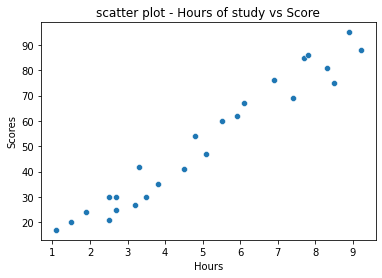

In [5]:
sns.scatterplot(x=data.Hours,y=data.Scores,data=data).set_title("scatter plot - Hours of study vs Score")

Text(0.5, 1.0, 'reg plot Hours of study vs Score')

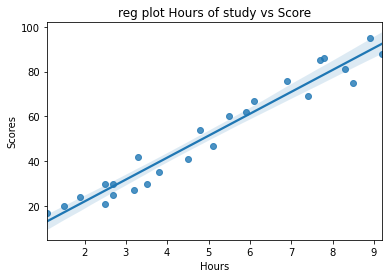

In [6]:
sns.regplot(x=data.Hours,y=data.Scores,data=data).set_title("reg plot Hours of study vs Score")

From the above plot, we can see that there is a linear relation between the Hours of Study and Scores

### We use the describe() method for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Finding the correlation between hours and scores

In [8]:
(data['Hours']).corr(data['Scores'])

0.9761906560220887

We can see that the correlation between the two coloums is almost equal to what is described as highly correlated.

### To train the model

In [9]:
# considering the hours to be as the independent variable and scores as the dependent variable

#Independent variable X 
X = data['Hours'].to_numpy().reshape(-1,1)

# dependent variable y
y =data['Scores'].to_numpy().reshape(-1,1)

In [10]:
# Using the 'scikit-learn' library, we will be spliting the data to train and test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### The data is thus divided into train and the test makes it possible to go further to develop the model using regression fit from scikit-learn 

In [11]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [12]:
print("intercept =",reg.intercept_,"coeff is =",reg.coef_)

intercept = [2.69128676] coeff is = [[9.78385439]]


In [13]:
print("intercept =",reg.intercept_,"coeff is =",reg.coef_)

intercept = [2.69128676] coeff is = [[9.78385439]]


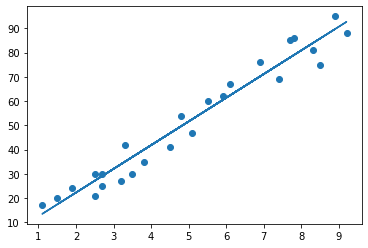

In [14]:
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Now predicting on the test data. 

In [15]:
yhat = reg.predict(X_test)
print("pred",yhat)
print("actual",y_test)

pred [[83.89727817]
 [27.15092273]
 [27.15092273]]
actual [[81]
 [30]
 [21]]


### Once we predict, let's verify the accuracy of our model.

In [16]:
reg.score(X_test,y_test)

0.974047128713709

### Now lets predicte score if a student studies for 9.25 hrs/ day

In [17]:
hours = np.array([9.25]).reshape(-1,1)
pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.19193983]


The percentage of a student who studies for 9.5 hours/day is 93.19% which is nearly 93%.

### lets try for student studying for 8 hours/day

In [18]:
hours = np.array([8]).reshape(-1,1)
pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[8]]
Predicted Score = [80.96212185]


The percentage of a student who studies for 8 hours/day is 80.96% which is nearly 81%.

### Model evaluation 

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("the RMS value is ",mean_squared_error(y_test, yhat))
print("the RMSE value is",mean_squared_error(y_test, yhat, squared=False))
print("the R2 eroor is ",r2_score(y_test, yhat))

the RMS value is  18.11510415783113
the RMSE value is 4.256184225081326
the R2 eroor is  0.974047128713709


### Conclusion

Hence we can see that,
the accuracy obtained is 97%.

The percentage of a student who studies for 9.5 hours/day is 93%.